In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv('dailyactivity_merged.csv')
print(data.head())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    3/25/2016       11004           7.11             7.11   
1  1503960366    3/26/2016       17609          11.55            11.55   
2  1503960366    3/27/2016       12736           8.53             8.53   
3  1503960366    3/28/2016       13231           8.93             8.93   
4  1503960366    3/29/2016       12041           7.85             7.85   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 4.07

In [6]:
print(data.isnull().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [13]:
# the dtypes of colum 'activitydate' is objects . we must change it datatype to datetime for use it . 
data['ActivityDate']=pd.to_datetime(data['ActivityDate'],format='%m%d%y')
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        457 non-null    int64         
 1   ActivityDate              457 non-null    datetime64[ns]
 2   TotalSteps                457 non-null    int64         
 3   TotalDistance             457 non-null    float64       
 4   TrackerDistance           457 non-null    float64       
 5   LoggedActivitiesDistance  457 non-null    float64       
 6   VeryActiveDistance        457 non-null    float64       
 7   ModeratelyActiveDistance  457 non-null    float64       
 8   LightActiveDistance       457 non-null    float64       
 9   SedentaryActiveDistance   457 non-null    float64       
 10  VeryActiveMinutes         457 non-null    int64         
 11  FairlyActiveMinutes       457 non-null    int64         
 12  LightlyActiveMinutes  

In [17]:
# pd.sample() show us random rows of number we assign as parameter to sample() for example 5 .
data['totalminutes']=data['VeryActiveMinutes'] + data['FairlyActiveMinutes']
print(data['totalminutes'].sample(5))

52       0
198      0
86       0
394    114
62       0
Name: totalminutes, dtype: int64


In [19]:
# this method give us a lot of informations about each column for example : count, mean, min , max, ...
print(data.describe())

                 Id                   ActivityDate    TotalSteps  \
count  4.570000e+02                            457    457.000000   
mean   4.628595e+09  2016-04-04 04:40:26.258205696   6546.562363   
min    1.503960e+09            2016-03-12 00:00:00      0.000000   
25%    2.347168e+09            2016-04-02 00:00:00   1988.000000   
50%    4.057193e+09            2016-04-05 00:00:00   5986.000000   
75%    6.391747e+09            2016-04-08 00:00:00  10198.000000   
max    8.877689e+09            2016-04-12 00:00:00  28497.000000   
std    2.293781e+09                            NaN   5398.493064   

       TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
count     457.000000       457.000000                457.000000   
mean        4.663523         4.609847                  0.179427   
min         0.000000         0.000000                  0.000000   
25%         1.410000         1.280000                  0.000000   
50%         4.090000         4.090000               

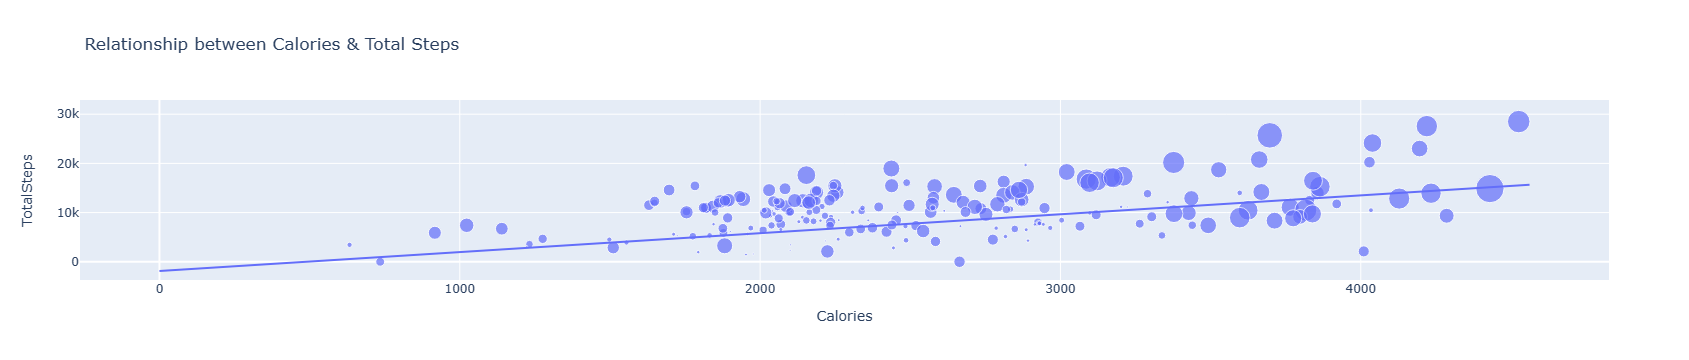

In [31]:
figure = px.scatter(data_frame = data, x="Calories",
                    y="TotalSteps", size="VeryActiveMinutes", 
                    trendline="ols", 
                    title="Relationship between Calories & Total Steps")
figure.show()

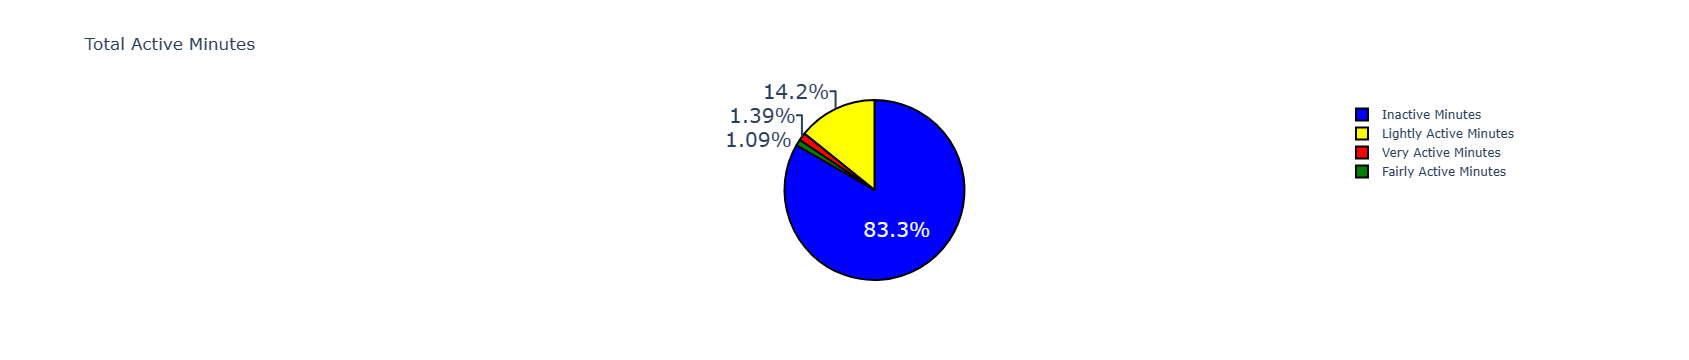

In [49]:
label = ["Very Active Minutes", "Fairly Active Minutes", 
         "Lightly Active Minutes", "Inactive Minutes"]
counts = data[["VeryActiveMinutes", "FairlyActiveMinutes", 
               "LightlyActiveMinutes", "SedentaryMinutes"]].mean()
colors = ['red','green', "yellow", "blue"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Total Active Minutes')
fig.update_traces(textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='black', width=2)))
fig.show()